### Outlier Detection Approaches
Turkey IQR (Inter Quartile Range), identifies extreme values in data. Outliers are defined as 
values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1)
We can find outliers using Sandard deviation from the mean to detect extreme values, the limitation of SD are 
it assumes data is normally distributed and its sensitive to extreme values



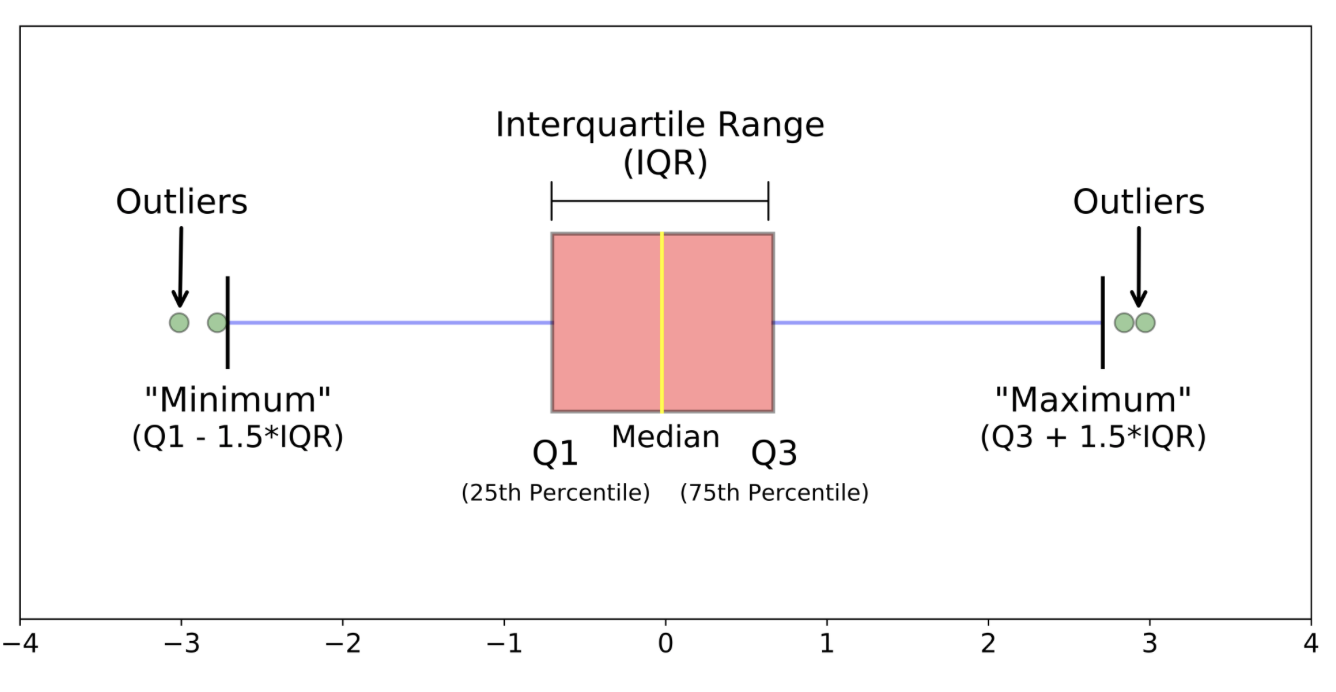

In [5]:
from IPython.display import Image
Image(filename='turkeyiqr.png',width = 6, height = 3)

In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
import seaborn as sns

In [6]:
data = load_boston()

In [7]:
df = pd.DataFrame(data= data.data, columns=data.feature_names)

In [9]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [17]:
x = df['LSTAT']
def irq_outlier(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)] )
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

turkey_indices, turkey_values = irq_outlier(x)
print(np.sort(turkey_values))

[31.99 34.02 34.37 34.41 34.77 36.98 37.97]


### Kernel Density Estimation
It is a process of estimating an unknown probability density function using a kernel function K(u), its a non-parametric 
way of estimating the probability density function this means we are not assuming any distribution (we do not assume that the data comes from a Gaussian 
and does not have mean or standard deviation to fit). We start with a finite set of data point and then we add a kernel (e.g. gaussian kernel , triangular kernel, cosine kernel) centered within each datapoint then add each of the kernel, as we add we will find that it approaches PDF. 

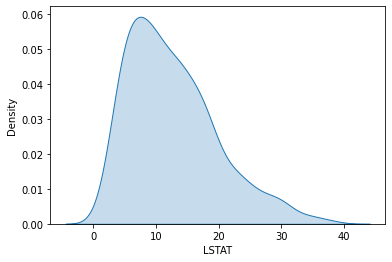

In [26]:
# Univariate 
sns.kdeplot(df.LSTAT, shade=True);

C:\Users\adhik\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


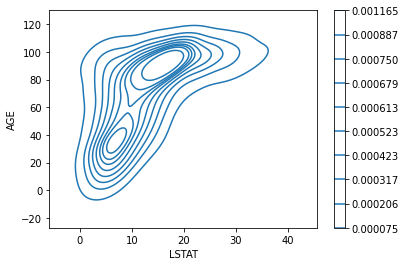

In [31]:
# Bivariate
sns.kdeplot(df.LSTAT,df.AGE, cbar=True);

In [32]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

In [33]:
def kde_outlier(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw="scott", fft=True)
    pred = kde.evaluate(x_scaled)

    n=sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_values = np.asarray(x)[outlier_ind]

    return outlier_ind, outlier_values

In [35]:
kde_indices, kde_values = kde_outlier(df.LSTAT)
print(np.sort(kde_values))

[29.93 29.97 30.59 30.62 30.63 30.81 30.81 31.99 34.02 34.37 34.41 34.77
 36.98 37.97]
